# Optimizing a neural network with backward propagation
  
Learn how to optimize the predictions generated by your neural networks. You'll use a method called backward propagation, which is one of the most important techniques in deep learning. Understanding how it works will give you a strong foundation to build on in the second half of the course.

## Resources
  
**Notebook Syntax**
  
<span style='color:#7393B3'>NOTE:</span>  
- Denotes additional information deemed to be *contextually* important
- Colored in blue, HEX #7393B3
  
<span style='color:#E74C3C'>WARNING:</span>  
- Significant information that is *functionally* critical  
- Colored in red, HEX #E74C3C
  
---
  
**Links**
  
[NumPy Documentation](https://numpy.org/doc/stable/user/index.html#user)  
[Pandas Documentation](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)  
[Matplotlib Documentation](https://matplotlib.org/stable/index.html)  
[Seaborn Documentation](https://seaborn.pydata.org)  
[Scikit-Learn Documentation](https://scikit-learn.org/stable/)  
[Mean Squared Error Wikipedia](https://en.wikipedia.org/wiki/Mean_squared_error)  
  
---
  
**Notable Functions**
  
<table>
  <tr>
    <th>Index</th>
    <th>Operator</th>
    <th>Use</th>
  </tr>
  <tr>
    <td>1</td>
    <td>numpy.array()</td>
    <td>Creates an array. An array is a grid of values and it contains information about the raw data, how to locate an element, and how to interpret an element. It has a grid of elements that can be indexed in various ways.</td>
  </tr>
    <td>2</td>
    <td>sklearn.metrics.mean_squared_error()</td>
    <td>Mean squared error regression loss. Measures how close a regression line is to a set of data points.  <br> </br> 
    Measures the average of the squares of the errors — that is, the average squared difference between the estimated values and the actual value. <br> </br> 
    As it is derived from the square of <b>Euclidean distance</b>, it is always a positive value that decreases as the error approaches zero.
    </td>
  </tr>
</table>
  

---
  
**Language and Library Information**  
  
Python 3.11.0  
  
Name: numpy  
Version: 1.24.3  
Summary: Fundamental package for array computing in Python  
  
Name: pandas  
Version: 2.0.3  
Summary: Powerful data structures for data analysis, time series, and statistics  
  
Name: matplotlib  
Version: 3.7.2  
Summary: Python plotting package  
  
Name: seaborn  
Version: 0.12.2  
Summary: Statistical data visualization  
  
Name: scikit-learn  
Version: 1.3.0  
Summary: A set of python modules for machine learning and data mining  
  
---
  
**Miscellaneous Notes**
  
<span style='color:#7393B3'>NOTE:</span>  
  
`python3.11 -m IPython` : Runs python3.11 interactive jupyter notebook in terminal.
  
`nohup ./relo_csv_D2S.sh > ./output/relo_csv_D2S.log &` : Runs csv data pipeline in headless log.  
  
`print(inspect.getsourcelines(test))` : Get self-defined function schema  
  
<span style='color:#7393B3'>NOTE:</span>  
  
Schema:  
- input array -> **array**: feature values
- weights for nodes -> **dictionary**: keys = node_name, values = weight of node/input
- node_999_in -> **neural network operation**: (prior_input * weight[]).sum()
- node_999_out -> **neural network operation**: activation function
- node_hidden_concat -> **array**: concat node_999out nodes into an array
- output_in -> **neural network operation**: (prior_input * weight[]).sum()
- output_out -> **neural network operation**: output activation function, softmax
- Display, or create function for above, then make a loop iter with a loop variable

In [11]:
import numpy as np                  # Numerical Python:         Arrays and linear algebra
import pandas as pd                 # Panel Datasets:           Dataset manipulation
import matplotlib.pyplot as plt     # MATLAB Plotting Library:  Visualizations
import seaborn as sns               # Seaborn:                  Visualizations


## The need for optimization
  
You've seen the forward-propagation algorithm that neural networks use to make predictions. However, the mere fact that a model has the structure of a neural network does not guarantee that it will make good predictions. To see the importance of model weights,
  
**A baseline neural network**
  
We'll go back to a network you saw in the previous chapter. We'll use a simple example for the sake of explanation. For the moment, we won't use an activation function in this example, or if you prefer, you might think of an activation function that returns the input, sometimes called the identity function. We have values of 2 and 3 for the inputs, and the true value of the target is 13. So, the closer our prediction is to 13, the more accurate this model is for this data point. We use forward propagation to fill in the values of hidden layer. That gives us hidden node values of 5 and 1. Continuing forward propagation, we use those hidden node values to make a prediction
of 9. Since the true target value is 13, our error is 13 minus 9, which is 4. 
  
<img src='../_images/the-need-for-optimization-neural-net.png' alt='img' width='450'>
  
Changing any weight will change our prediction. Let’s see what happens if we change the two weights from the hidden layer to the output. In this case, we make the top weight 3 and the bottom weight -2. Now forward propagation gives us a prediction of 13. That is exactly the value we wanted to predict. So, this change in weights improved the model for this data point.
  
<img src='../_images/the-need-for-optimization-neural-net1.png' alt='img' width='450'>
  
**Predictions with multiple points**
  
Making accurate predictions gets harder with multiple points. First of all, at any set of weights, we have many values of the error, corresponding to the many points we make predictions for. We use something called a loss function to aggregate all the errors into a single measure of the model's predictive performance. 
  
- Making accurate predictions gets harder with more points
- At any set of weights, there are many values of the error corresponding to the many points we make predictions for
  
**Squared error loss function**
  
For example, a common loss function for regression tasks is mean-squared error. You square each error, and take the average of that as a measure of model quality. The loss function aggregates all of the errors into a single score. 
  
<img src='../_images/the-need-for-optimization-neural-net2.png' alt='img' width='550'>
  
**Loss function**
  
For an illustration, consider a model with only two weights, we could plot the model's performance for each set of weights like this. The values of the weights are plotted on the x and y axis, and the loss function is on the vertical or z axis.
  
<img src='../_images/the-need-for-optimization-neural-net3.png' alt='img' width='550'>
  
Lower values mean a better model, so our goal is to find the weights giving the lowest value for the loss function. We do this with an algorithm called gradient descent. An analogy may be helpful.
  
- Loss function aggregates errors in predictions from many data points into single number
- Measure of model's predictive performance
- Lower loss function value means a better model
- Goal: Find the weights that give the lowest value for the loss function, Gradient Descent
  
**Gradient descent**
  
Imagine you are in a pitch dark field, and you want to find the lowest point. You might feel the ground to see how it slopes, and take a small step downhill. This gives an improvement, but not necessarily the lowest point yet. So you repeat this process until it is uphill in every direction. This is roughly how gradient descent works.
  
The steps are: Start at a random point, until you are somewhere flat, find the slope, and take a step downhill. Let's look at optimizing a model with a single weight, and then we'll scale up to optimizing multiple weights. 
  
1. Start at random point
2. Until you are somewhere flat:
- Find the slope
- Take a step downhill
  
**Optimizing a model with a single weight**
  
We have a curve showing the loss function on the vertical axis, at different values of the weight, which is on the horizontal axis. We are looking for the low point on this curve, because that means our model is as accurate as possible. We have drawn this tangent line to the curve at our current point. The slope of that tangent line captures the slope of the loss function at the our current weight. That slope corresponds to something called the derivative from calculus. 
  
<img src='../_images/the-need-for-optimization-neural-net4.png' alt='img' width='550'>
  
We use this slope to decide what direction we step. In this case, the slope is positive. So if we want to go downhill, we go in the direction opposite the slope, towards lower numbers. If we repeatedly take small steps opposite the slope, recalculating the slope each time, we will eventually get to the minimum value.
  


### Calculating model errors
  
For the exercises in this chapter, you'll continue working with the network to predict transactions for a bank.
  
What is the error (predicted - actual) for the following network using the ReLU activation function when the input data is [3, 2] and the actual value of the target (what you are trying to predict) is 5? It may be helpful to get out a pen and piece of paper to calculate these values.
  
<img src='../_images/the-need-for-optimization-neural-net5.png' alt='img' width='550'>
  
Possible Answers
  
- [ ] 5
- [ ] 6
- [x] 11
- [ ] 16 ~(Not quite. Remember, you should calculate the error rather than the prediction.)
  
Well done! The network generates a prediction of 16, which results in an error of 11.

### Understanding how weights change model accuracy
  
Imagine you have to make a prediction for a single data point. The actual value of the target is 7. The weight going from `node_0` to the output is 2, as shown below. If you increased it slightly, changing it to 2.01, would the predictions become more accurate, less accurate, or stay the same?
  
<img src='../_images/the-need-for-optimization-neural-net6.png' alt='img' width='550'>
  
Possible Answers
  
- [ ] More accurate
- [x] Less accurate
- [ ] Stay the same
  
Exactly! Increasing the weight to 2.01 would increase the resulting error from 9 to 9.08, making the predictions less accurate.

### Coding how weight changes affect accuracy
  
Now you'll get to change weights in a real network and see how they affect model accuracy!
  
Have a look at the following neural network:
  
<img src='../_images/the-need-for-optimization-neural-net7.png' alt='img' width='485'>
  
Its weights have been pre-loaded as `weights_0`. Your task in this exercise is to update a single weight in `weights_0` to create `weights_1`, which gives a perfect prediction (in which the predicted value is equal to `target_actual`: 3).
  
Use a pen and paper if necessary to experiment with different combinations. You'll use the `predict_with_network()` function, which takes an array of data as the first argument, and weights as the second argument.
  
1. Create a dictionary of weights called `weights_1` where you have changed 1 weight from `weights_0` (You only need to make 1 edit to `weights_0` to generate the perfect prediction).
2. Obtain predictions with the new weights using the `predict_with_network()` function with `input_data` and `weights_1`.
3. Calculate the error for the new weights by subtracting `target_actual` from `model_output_1`.
4. Print to see how the errors compare

In [12]:
# Creating ReLU function
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculate
    return output


# Creating neural net
def predict_with_network(input_data_point, weights):
    # Hidden layer nodes
    node_0_input = (input_data_point * weights['node_0']).sum()
    node_0_output = relu(node_0_input)
    
    node_1_input = (input_data_point * weights['node_1']).sum()
    node_1_output = relu(node_1_input)
    
    # Concat layer to an array for passing to next layer
    hidden_layer_values = np.array([node_0_output, node_1_output])
    
    # Output
    input_to_final_layer = (hidden_layer_values * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    return(model_output)



In [13]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {
    'node_0': [2, 1],
    'node_1': [1, 2],
    'output': [1, 1]
}

# The actual target value, used to calculate the error (y_true ie. y_test)
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {
    'node_0': [2, 1],
    'node_1': [1, 2],
    'output': [1, 0]
}

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


The network now generates a perfect prediction with an error of 0.

### Scaling up to multiple data points
  
You've seen how different weights will have different accuracies on a single prediction. But usually, you'll want to measure model accuracy on many points. You'll now write code to compare model accuracies for two different sets of weights, which have been stored as `weights_0` and `weights_1`.
  
`input_data` is a list of arrays. Each item in that list contains the data to make a single prediction. `target_actuals` is a list of numbers. Each item in that list is the actual value we are trying to predict.
  
In this exercise, you'll use the `mean_squared_error()` function from `sklearn.metrics`. It takes the true values and the predicted values as arguments.
  
You'll also use the preloaded `predict_with_network()` function, which takes an array of data as the first argument, and weights as the second argument.
  
1. Import `mean_squared_error from` `sklearn.metrics`.
2. Using a for loop to iterate over each row of `input_data`:
3. Make predictions for each row with `weights_0` using the `predict_with_network()` function and append it to `model_output_0`.
4. Do the same for `weights_1`, appending the predictions to `model_output_1`.
5. Calculate the mean squared error of `model_output_0` and then `model_output_1` using the `mean_squared_error()` function. The first argument should be the actual values (`target_actuals`), and the second argument should be the predicted values (`model_output_0` or `model_output_1`).

In [14]:
# Weight set 0
weights_0 = {
    'node_0': np.array([2, 1]),
    'node_1': np.array([1, 2]),
    'output': np.array([1, 1])
}

# Weight set 1
weights_1 = {
    'node_0': np.array([2, 1]),
    'node_1': np.array([1, 1.5]),
    'output': np.array([1, 1.5])
}

# Input feature values
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]

# y_true ie. y_test
target_actuals = [1, 3, 5, 7]

In [15]:
from sklearn.metrics import mean_squared_error


# Create loop-variable for model_output_0
model_output_0 = []
# Create loop-variable for model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))
    

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(model_output_0, target_actuals)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(model_output_1, target_actuals)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: {:.4f}".format(mse_0))
print("Mean squared error with weights_1: {:.4f}".format(mse_1))

Mean squared error with weights_0: 37.5000
Mean squared error with weights_1: 49.8906


It looks like `model_output_1` has a higher mean squared error, so model0 is better.

## Gradient descent
  
With gradient descent, you repeatedly repeatedly found a slope capturing how your loss function changes as a weight changes. You then made a small change to the weight to get to a lower point, and you repeated this until you couldn't go downhill any more.
  
- If the slope is positive:
- - Going opposite the slope means moving to lower numbers
- - Subtract the slope from the current value
- - Too big a step might lead us astray
- Solution: learning rate ($\eta$ ie. eta)
- - Update each weight by subtracting learning rate * slope
  
If the slope is positive, going opposite the slope means moving to lower numbers. Subtracting the slope from the current value achieves this. But too big a step might lead us far astray. So, instead of directly subtracting the slope, we multiply the slope by a small number, called the learning rate, and we change the weight by the product of that multiplication. Learning rate are frequently around 0.01. This ensures we take small steps, so we reliably move towards the optimal weights. But how do we find the relevant slope for each weight we need to update? Working this out for yourself involves calculus, especially the application of the chain rule. Don't worry if you don't remember or don't know the underlying calculus. We'll explain some basic concepts here, and Keras and TensorFlow do the calculus for us.
  
**Slope calculation example**
  
Here is a first example to calculate a slope for a weight, and in this example we will look at a single data point. Weights feed from one node into another, and you always get the slope you need by multiplying three things. First, the slope of the loss function with respect to the value at the node we feed into. Second, the value of the node that feeds into our weight. Third, the slope of the activation function with respect to the value we feed into. Let's start with the slope of the loss function with respect to the value of the node our weight feeds into. In this case, that node is the model's prediction. 
  
<img src='../_images/gradient-descent-in-action-neural-net.png' alt='img' width='550'>
  
If you work through some calculus, you will find that the slope of the mean-squared loss function with respect to the prediction is 2 times (predicted value - actual value). Which is 2 times the error. Here, the prediction from forward propagation was 6. The actual target value is 10, so the error is 6 minus 10, which is -4. 
  
<img src='../_images/gradient-descent-in-action-neural-net1.png' alt='img' width='550'>
  
The second thing we multiply is the value at the node we are feeding from. Here, that is 3. Finally, the slope of the activation function at the value we feed into. 
  
<img src='../_images/gradient-descent-in-action-neural-net2.png' alt='img' width='550'>
  
Since we don't have an activation function here, we can leave that out. So our final result for the slope of the loss if we graphed it against this weight is 2 times -4 times 3, or negative 24. We would now improve this weight by subtracting the learning rate times that slope, minus 24. If the learning rate were point-01, we would update this weight to be 2.24.That gives us a better model. And it would continue improving if we repeated this process. For multiple weights feeding to the output, we repeat this calculation separately for each weight. Then we update both weights simultaneously using their respective derivatives.
  
<img src='../_images/gradient-descent-in-action-neural-net3.png' alt='img' width='550'>
    
**Code to calculate slopes and update weights**
  
Let’s see the code to calculate slopes and update the weights. First, we set up the weights, input data, and a target value to predict. Here is the slope calculation. We uses numpy broadcasting, which multiplies an array by a number so that each entry in the array is multiplied by that number. We multiply the two times the error times the array with the input nodes. This gives us an array that used the 1st node value for the first calculated slope, and the second node value for the 2nd calculated slope. This is exactly what we wanted. Incidentally, the mathematical term for this array of slopes is a "gradient", and this is where the name gradient descent comes from. We update the weights by some small step in that direction, where the step size is partially determined by the learning rate. And the new error is 2.5, which is an improvement over the old error, which was 5. Repeating that process from the new values would give further improvements.
  
```python
import numpy as np
weights = np.array([1, 2])
input_data = np.array([3, 4])
target = 6
learning_rate = 0.01
preds = (weights * input_data).sum()
error = preds - target
print(error)
# 5

gradient = 2 * input_data * error
gradient
# array([30, 40])

weights_updated = weights - learning_rate * gradient
preds_updated = (weights_updated * input_data).sum()
error_updated = preds_updated - target
print(error_updated)
# 2.5
```


### Calculating slopes
  
You're now going to practice calculating slopes. When plotting the mean-squared error loss function against predictions, the slope is `2 * x * (xb-y)`, or `2 * input_data * error`. Note that `x` and `b` may have multiple numbers (`x` is a vector for each data point, and `b` is a vector). In this case, the output will also be a vector, which is exactly what you want.
  
You're ready to write the code to calculate this slope while using a single data point. You'll use pre-defined weights called `weights` as well as data for a single point called `input_data`. The actual value of the target you want to predict is stored in `target`.
  
1. Calculate the predictions, `preds`, by multiplying `weights` by the `input_data` and computing their sum.
2. Calculate the error, which is `preds` minus `target`. Notice that this error corresponds to `xb-y` in the gradient expression.
3. Calculate the slope of the loss function with respect to the prediction. To do this, you need to take the product of `input_data` and `error` and multiply that by `2`.

**Slope intercept**  
$y = mx+b$  
  
**Slope**  
$m = (y2 - y1)/(x2 - x1) = \Delta y/\Delta x$  
  
**Slope is equal to $\tan \emptyset$**  
$\tan \emptyset = (y2 - y1)/(x2 - x1)$  
$m = \tan \emptyset$  

In [16]:
input_data = np.array([1, 2, 3])
weights = np.array([0, 2, 1])
target = 0

In [17]:
# Calculate the predictions: preds
preds = (input_data * weights).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Print the slope
print(slope)

[14 28 42]


You can now use this slope to improve the weights of the model!

### Improving model weights
  
You've just calculated the slopes you need. Now it's time to use those slopes to improve your model. If you add the slopes to your weights, you will move in the right direction. However, it's possible to move too far in that direction. So you will want to take a small step in that direction first, using a lower learning rate, and verify that the model is improving.
  
The weights have been pre-loaded as `weights`, the actual value of the target as target, and the input data as `input_data`. The predictions from the initial weights are stored as `preds`.
  
1. Set the learning rate to be `0.01` and calculate the error from the original predictions.
2. Calculate the updated weights by subtracting the product of `learning_rate` and `slope` from `weights`.
3. Calculate the updated predictions by multiplying `weights_updated` with `input_data` and computing their sum.
4. Calculate the error for the new predictions. Store the result as `error_updated`.
5. Print

In [18]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - learning_rate * slope

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

7
5.04


Updating the model weights did indeed decrease the error!

### Making multiple updates to weights
  
You're now going to make multiple updates so you can dramatically improve your model weights, and see how the predictions improve with each update.
  
To keep your code clean, there is a pre-loaded `get_slope()` function that takes `input_data`, `target`, and `weights` as arguments. There is also a `get_mse()` function that takes the same arguments. The `input_data`, `target`, and `weights` have been pre-loaded.
  
This network does not have any hidden layers, and it goes directly from the input (with 3 nodes) to an output node. Note that `weights` is a single array.
  
We have also pre-loaded `matplotlib.pyplot`, and the error history will be plotted after you have done your gradient descent steps.
  
1. Using a for loop to iteratively update `weights`:
- Calculate the slope using the `get_slope()` function.
- Update the `weights` using a learning rate of `0.01`.
- Calculate the mean squared error (`mse`) with the updated `weights` using the `get_mse()` function.
- Append `mse` to `mse_hist`.
2. Visualize `mse_hist`. What trend do you notice?

In [19]:
def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return error


def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return slope


def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors ** 2)
    return mse



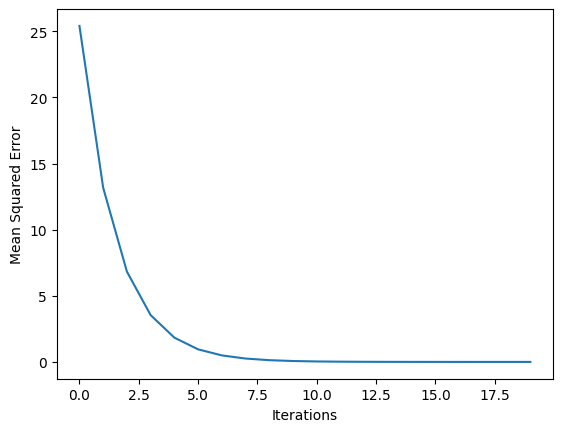

In [20]:
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - learning_rate * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)


# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

As you can see, the mean squared error decreases as the number of iterations go up.

## Backpropagation
  
You’ve used gradient descent to optimize weights in a simple model. Now we'll add a technique called “back propagation” to calculate the slopes you need to optimize more complex deep learning models.
  
**Backpropagation**
  
Just as forward propagation sends input data through the hidden layers and into the output layer, back propagation takes the error from the output layer and propagates it backward through the hidden layers, towards the input layer.
  
<img src='../_images/backpropagation-in-action-neural-networks.png' alt='img' width='550'>
  
It calculates the necessary slopes sequentially from the weights closest to the prediction, through the hidden layers, eventually back to the weights coming from the inputs. We then use these slopes to update our weights as you've seen. Back propagation is tricky. So you should focus on the general structure of the algorithm, rather than trying to memorize every mathematical detail.
  
- Allows gradient descent to update all weights in neural network (by getting gradients for all weights) 
- Comes from chain rule of calculus
- Important to understand the process, but you will generally use a library that implements this
  
**Backpropagation process**
  
In the big picture, we are trying to estimate the slope of the loss function with respect to each weight in our network. You've already seen that we use prediction errors to calculate some of those slopes. So we always do forward propagation to make a prediction and calculate an error before we do back propagation. 
  
<img src='../_images/backpropagation-in-action-neural-networks1.png' alt='img' width='550'>
  
Here are the results of forward propagation. Node values are in white and weights are in black. We need to be at this step before we can start back-propagation. Notice, we are using the "relu" activation function. So any node whose input is negative takes a value of 0, and that happens in the top node of the first hidden layer.
  
For back-propagation, we go back one layer at a time, and each time we go back a layer, we'll use a formula for slopes that you saw in the last video. Every weight feeds from some input node into some output node. The three things we multiply to get the slope for that weight are1, the value at the weights input node.2, the slope from plotting the loss function against that weight's output node.3, the slope of the activation function at the weight's output. We know the value at the node feeding into this weight. Either it is in an input layer, in which case we have it from the data. Or that node is in a hidden layer, in which case we calculated its value when we did forward propagation. The second item on this list is the slope of the loss function with respect to the output node. We do backward propagation from the right side of our diagram to the left. So we already calculated that slope by the time we to plug it into the current calculation. Finally we need the slope of the activation function at the node it feeds into.
  
- Tries to estimate the slope of the loss function w.r.t each weight
- Do forward propagation to calculate predictions and errors, before backpropagation
- Go back one layer at a time
- Gradients for weight is product of:
1. Node value feeding into that weight
2. Slope of loss function w.r.t node it feeds into
3. Slope of activation function at the node it feeds into
  
**ReLU Activation Function**
  
You can see from this diagram that, for the ReLU function, the slope is 0 if the input into a node is negative. If the input into the node is positive, the output is the same as the input. So the slope would be 1.
  
<img src='../_images/backpropagation-in-action-neural-networks2.png' alt='img' width='550'>
  
**Backpropagation process**
  
So far, we have focused on calculating slopes of the loss function with respect to weights. We also keep track of the slopes of the loss function with respect to node values, because we use those slopes in our calculations of slopes at weights. The slope of the loss function with respect to any node value is the sum of the slopes for every weight coming into that node.
  
- Need to also keep track of the slopes of the loss function w.r.t node values
- Slope of node values are the sum of the slopes for all weights that come out of them

### The relationship between forward and backward propagation
  
If you have gone through 4 iterations of calculating slopes (using backward propagation) and then updated weights, how many times must you have done forward propagation?
  
Possible Answers

- [ ] 0
- [ ] 1
- [x] 4
- [ ] 8
  
Exactly! Each time you generate predictions using forward propagation, you update the weights using backward propagation.

### Thinking about backward propagation
  
If your predictions were all exactly right, and your errors were all exactly 0, the slope of the loss function with respect to your predictions would also be 0. In that circumstance, which of the following statements would be correct?
  
Possible Answers
  
- [x] The updates to all weights in the network would also be 0.
- [ ] The updates to all weights in the network would be dependent on the activation functions.
- [ ] The updates to all weights in the network would be proportional to values from the input data.
  
Correct! In this situation, the updates to all weights in the network would indeed also be 0.

## Backpropagation in practice
  
Let’s see this back propagation in a deeper network.
  
**Backpropagation**
  
Start at the last set of weights. Those are currently 1 and 2. 
  
<img src='../_images/backpropagation-in-practice.png' alt='img' width='550'>
  
We multiply 3 things. The node values feeding into these weights are 1 and 3.
  
<img src='../_images/backpropagation-in-practice1.png' alt='img' width='550'>
  
The relevant slope for the output node is 2 times the error. That’s 6. 
  
<img src='../_images/backpropagation-in-practice2.png' alt='img' width='550'>
  
And the slope of the activation function is 1, since the output node is positive. So, we have a slope for the top weight of 6, and a slope for the bottom weight of 18.Those slopes we just calculated feed into the formula associated with weights further back in the network. Let's do that calculation one layer back now. We’ve hidden the earlier and later layers, since we don’t need them to calculate the slopes for this layer of the network. This graph uses white to denotes node values, black to denote weight values, and the red shows the calculated slopes of the loss function with respect to that node, which we just finished calculating. This is all the information we need to calculate the slopes of the loss function with respect to the weights in this diagram.
  
<img src='../_images/backpropagation-in-practice3.png' alt='img' width='550'>
  
**Calculating slopes associated with any weight**
  
Recall, the three things we multiply to get slopes associated with any weight: value at the node feeding into the weight,the slope of the activation function for the node being fed into. That slope is 1 in all cases here. The slope of the loss function with respect to the output node. 
  
**Backpropagation**
  
Let's start with the slopes related to the weights going into the top node. For the top weight going into the top node, we multiply 0 for the input node's value, which is in white. 
  
Times 6 for the output node's slope, which is in red. Times the derivative of the ReLU activation function. That output node has a positive value for the input, so the ReLU activation has a slope of 1. 0 times 6 times 1 is 0. For the other weight going into this node, we have 1 times 6 times the slope of the ReLU activation function at the output node's value. The slope of the activation function is still 1. So, we have 1 times 6 times 1, which is 6. 
  
Here we also show slopes associated with the other two weights. We would multiply them all by a learning rate, and use the results to update the weights in gradient descent. Pause the video and make sure you understand how these last two weights were calculated. 
  
<img src='../_images/backpropagation-in-practice4.png' alt='img' width='550'>
  
You are through the hardest concepts in this course which are gradient descent and back-propagation. 
  
**Backpropagation: Recap**
  
As a recap, we start at some random set of weights. We then go through the following iterative process Use forward propagation to make a prediction. Use backward propagation to calculate the slope of the loss function with respect to each weight. Multiply that slope by the learning rate, and subtract that from the current weights. Keep going with that cycle until we get to a flat part. 
  
<img src='../_images/backpropagation-in-practice5.png' alt='img' width='550'>
  
**Stochastic gradient descent**
  
For computational efficiency, it is common to calculate slopes on only a subset of the data, called a batch, for each update of the weights. You then use a different batch of data to calculate the next update. Once we have used all our data, we start over again at the beginning of the data. Each time through the full training data is called an epoch. So if we're going through our data for the 3rd time, we'd say we are on the 3rd epoch. When slopes are calculated on one batch at a time, rather than on the full data, that is called stochastic gradient descent, rather than gradient descent, which uses all of the data for each slope calculation. The process will be partially automated for you, but understanding the process will help fix any surprises that come up when building your models.
  
<img src='../_images/backpropagation-in-practice6.png' alt='img' width='550'>
  


### A round of backpropagation
  
In the network shown below, we have done forward propagation, and node values calculated as part of forward propagation are shown in white. The weights are shown in black. Layers after the question mark show the slopes calculated as part of back-prop, rather than the forward-prop values. Those slope values are shown in purple.
  
This network again uses the ReLU activation function, so the slope of the activation function is 1 for any node receiving a positive value as input. Assume the node being examined had a positive value (so the activation function's slope is 1).
  
<img src='../_images/backpropagation-in-practice7.png' alt='img' width='550'>
  
Possible Answers
  
- [ ] 0
- [ ] 2
- [x] 6
- [ ] Not enough information
  
Well done! The slope needed to update this weight is indeed 6. You're now ready to start building deep learning models with Keras!

<span style='color:#7393B3'>NOTE:</span> To calculate the slope for backpropagation in a neural network, you need to compute the gradient of the loss function with respect to the network's parameters. This gradient provides information about how the loss changes as you vary the parameters. The slope or gradient can be used to update the parameters using an optimization algorithm such as gradient descent.

Here's a general outline of the process for calculating the slope in backpropagation:

1. Forward Pass:
   - Perform a forward pass through the neural network to obtain the predicted output. This involves propagating the input data through the network layer by layer, applying activation functions and combining weights along the way.

2. Loss Function:
   - Define a loss function that quantifies the difference between the predicted output and the actual output. Common loss functions include mean squared error (MSE) or cross-entropy loss, depending on the problem.

3. Backward Pass:
   - Start the backward pass by computing the gradient of the loss function with respect to the output of the neural network. This step depends on the specific loss function used.

4. Chain Rule:
   - Use the chain rule of calculus to propagate the gradient backward through the layers of the network. At each layer, you calculate the gradient of the loss function with respect to the layer's inputs and its parameters (weights and biases).
   - The chain rule is a fundamental rule in calculus used to calculate the derivative of a composition of functions. In the context of neural networks and backpropagation, the chain rule is crucial for propagating gradients through the layers of the network.
   - Let's say we have a function $y = f(g(x))$, where $x$ is the input, $g(x)$ is an intermediate function, and $f(g)$ is the final function. The chain rule states that the derivative of $y$ with respect to $x$ can be computed as follows: $dy/dx = (df/dg) * (dg/dx)$
   - In other words, the derivative of the outer function $f$ with respect to the inner function $g$ is multiplied by the derivative of the inner function $g$ with respect to the original variable $x$.
   - The chain rule can be extended to compositions of more than two functions. For example, if we have $y = f(g(h(x)))$, the chain rule can be applied iteratively as follows: $dy/dx = (df/dg) * (dg/dh) * (dh/dx)$
   - In the context of backpropagation in neural networks, the chain rule is applied iteratively through the layers of the network to calculate the gradients with respect to the parameters. The chain rule allows us to decompose the derivative of the loss function with respect to the network's output, and propagate it backward through each layer, multiplying by the derivatives of the activation functions and the weights at each step.
   - By applying the chain rule recursively, we can calculate the gradients for all the parameters in the network and use them to update the weights and biases during the training process.
   - The specific form of the chain rule formula can vary depending on the functions and variables involved. In the context of neural networks, the chain rule is typically applied to compute gradients for backpropagation.

5. Parameter Updates:
   - Once you have computed the gradients for all the network parameters, you can update the parameters using an optimization algorithm such as gradient descent. The update is typically done by subtracting a fraction of the gradient (scaled by a learning rate) from the current parameter values.

This process is iterated over multiple training examples, adjusting the parameters in the direction that minimizes the loss function. The specific implementation details and formulas for computing gradients can vary depending on the network architecture and activation functions used.

<span style='color:#7393B3'>NOTE:</span> It's worth noting that libraries like TensorFlow or PyTorch handle the automatic computation of gradients and provide tools for implementing backpropagation efficiently.
  
<span style='color:#7393B3'>NOTE:</span> The formula for calculating the gradient or slope in backpropagation depends on the specific layer and activation function being used in the neural network. This is the general formula for calculating the gradient with respect to the weights of a layer in a feedforward neural network.
  
Let's consider a single layer of a neural network with weights denoted by $W$ and biases denoted by $b$. The output of this layer is represented by $z$, and the activation function applied to $z$ is denoted by $a$. We assume that the loss function is denoted by $L$.

The formula for calculating the gradient of the loss function with respect to the weights ($dW$) is given by the chain rule:
  
$formula.$
  
$\Large dW = \frac{dL}{da} * \frac{da}{dz} * \frac{dz}{dW}$
  
$where.$
  
$dL/da$ : The partial derivative of the loss function with respect to the output of the layer. This term is often provided by the specific loss function being used.
  
$da/dz$ : The derivative of the activation function with respect to the layer's inputs ($z$). This term depends on the choice of activation function and can vary. For example, for the sigmoid activation function, $da/dz = a * (1 - a)$.
  
$dz/dW$ : The derivative of the layer's inputs with respect to the weights ($W$). This term depends on the specific layer. In a feedforward network, $dz/dW$ is equal to the input values of the layer.
  
---
  
By applying this formula and the chain rule recursively, you can calculate the gradients for all the weights and biases in the network during the backpropagation process. The gradients are then used to update the parameters using an optimization algorithm, such as gradient descent, to minimize the loss function and improve the network's performance.
  
<span style='color:#7393B3'>NOTE:</span> It's important to note that the formula can differ for different types of layers (e.g., convolutional layers, recurrent layers) and activation functions, and there may be additional terms involved. The specific details will depend on the architecture and design choices of the neural network.